# EDA and STATS Mini Project-FIFA Case Study 


A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using a data-based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total of 15 players are required. Player data for all teams have been acquired from FIFA.

This data contains information about the players, the clubs they are currently playing for, and various performance measures. There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.


#1. Import the necessary libraries and read the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import statistics
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from statsmodels.stats import weightstats as stests

In [ ]:
#Data Description
var=pd.read_csv("/content/drive/MyDrive/EDA_Stats_MiniProject/project 3/fifa_ variable_information.csv")
var

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag
5,Overall,overall rating
6,Potential,potential rating
7,Club,current club
8,Club Logo,url to club logo
9,Value,current market value


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/EDA_Stats_MiniProject/project 3/fifa.csv")
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,240331,P. Camará,21,https://cdn.sofifa.org/players/4/19/240331.png,Guinea Bissau,https://cdn.sofifa.org/flags/119.png,58,69,Crawley Town,https://cdn.sofifa.org/teams/2/light/110890.png,...,46.0,14.0,18.0,15.0,7.0,9.0,9.0,6.0,15.0,€429K
1,183465,J. Rodwell,27,https://cdn.sofifa.org/players/4/19/183465.png,England,https://cdn.sofifa.org/flags/14.png,68,68,Blackburn Rovers,https://cdn.sofifa.org/teams/2/light/3.png,...,69.0,66.0,69.0,64.0,9.0,10.0,15.0,11.0,12.0,€1.8M
2,205186,P. Gazzaniga,26,https://cdn.sofifa.org/players/4/19/205186.png,Argentina,https://cdn.sofifa.org/flags/52.png,74,78,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,55.0,23.0,20.0,11.0,76.0,73.0,84.0,72.0,76.0,€9.6M
3,233531,Y. Soteldo,21,https://cdn.sofifa.org/players/4/19/233531.png,Venezuela,https://cdn.sofifa.org/flags/61.png,71,81,Universidad de Chile,https://cdn.sofifa.org/teams/2/light/15029.png,...,65.0,25.0,23.0,20.0,13.0,7.0,9.0,13.0,6.0,€6.1M
4,243718,R. Koot,18,https://cdn.sofifa.org/players/4/19/243718.png,Netherlands,https://cdn.sofifa.org/flags/34.png,56,68,Fortuna Sittard,https://cdn.sofifa.org/teams/2/light/634.png,...,39.0,11.0,14.0,12.0,59.0,55.0,59.0,55.0,56.0,€198K


In [ ]:
df.shape

(25490, 60)

#2. Drop any columns that you deem unnecessary for analysis.

In [ ]:
# Columns that are  important for further analysis are:-
col = ['ID','Name','Age','Nationality','Overall','Potential','Value','Wage','Joined','Preferred Foot',
'Contract Valid Until', 'Height', 'Weight', 'Penalties', 'Release Clause', 'International Reputation', 'Position']

In [ ]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [ ]:
C = list(set(df.columns) - set(col))

In [ ]:
C

['Jumping',
 'Crossing',
 'Strength',
 'GKKicking',
 'Interceptions',
 'LongShots',
 'Body Type',
 'LongPassing',
 'GKDiving',
 'Dribbling',
 'Work Rate',
 'Reactions',
 'StandingTackle',
 'Stamina',
 'BallControl',
 'Volleys',
 'SprintSpeed',
 'Club Logo',
 'Marking',
 'Aggression',
 'Acceleration',
 'Loaned From',
 'ShortPassing',
 'FKAccuracy',
 'Photo',
 'Club',
 'Positioning',
 'GKPositioning',
 'Vision',
 'Finishing',
 'Composure',
 'Skill Moves',
 'Weak Foot',
 'Curve',
 'GKHandling',
 'HeadingAccuracy',
 'Flag',
 'GKReflexes',
 'ShotPower',
 'Agility',
 'Jersey Number',
 'SlidingTackle',
 'Balance']

In [ ]:
df.drop(C,axis=1,inplace=True) #dropping unnecessary columns from the original dataframe.

In [ ]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Penalties,Release Clause
0,240331,P. Camará,21,Guinea Bissau,58,69,€220K,€1K,Right,1.0,LS,"Jun 8, 2017",2019,6'1,161lbs,58.0,€429K
1,183465,J. Rodwell,27,England,68,68,€925K,€16K,Right,2.0,CM,"Aug 23, 2018",2019,6'2,172lbs,57.0,€1.8M
2,205186,P. Gazzaniga,26,Argentina,74,78,€5M,€46K,Right,1.0,GK,"Aug 23, 2017",2022,6'5,198lbs,41.0,€9.6M
3,233531,Y. Soteldo,21,Venezuela,71,81,€3.8M,€6K,Right,1.0,CAM,"Jan 11, 2018",2018,5'3,121lbs,71.0,€6.1M
4,243718,R. Koot,18,Netherlands,56,68,€120K,€1K,Right,1.0,GK,"Jul 1, 2016",2020,6'1,176lbs,15.0,€198K


In [ ]:
df.shape

(25490, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25490 entries, 0 to 25489
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        25490 non-null  int64  
 1   Name                      25490 non-null  object 
 2   Age                       25490 non-null  int64  
 3   Nationality               25490 non-null  object 
 4   Overall                   25490 non-null  int64  
 5   Potential                 25490 non-null  int64  
 6   Value                     25490 non-null  object 
 7   Wage                      25490 non-null  object 
 8   Preferred Foot            25425 non-null  object 
 9   International Reputation  25425 non-null  float64
 10  Position                  25401 non-null  object 
 11  Joined                    23319 non-null  object 
 12  Contract Valid Until      25094 non-null  object 
 13  Height                    25425 non-null  object 
 14  Weight

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Name,25490,13053,R. Williams,13
Nationality,25490,160,England,2332
Value,25490,204,€1.1M,621
Wage,25490,140,€1K,6805
Preferred Foot,25425,2,Right,19454
Position,25401,27,ST,2882
Joined,23319,1559,"Jul 1, 2018",2169
Contract Valid Until,25094,34,2019,6825
Height,25425,21,6'0,3940
Weight,25425,56,165lbs,2064


In [ ]:
#Correcting datatypes

In [ ]:
colsToString = ['ID','Name','Nationality','Preferred Foot','Position']

In [ ]:
for i in colsToString:
    df[i] = df[i].astype('string')

In [ ]:
df.dtypes

ID                           string
Name                         string
Age                           int64
Nationality                  string
Overall                       int64
Potential                     int64
Value                        object
Wage                         object
Preferred Foot               string
International Reputation    float64
Position                     string
Joined                       object
Contract Valid Until         object
Height                       object
Weight                       object
Penalties                   float64
Release Clause               object
dtype: object

#4. Check the duplicate records and do appropriate treatments.

In [ ]:
df.duplicated().sum()

11833

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.reset_index(drop=True,inplace=True)
df.shape

(13657, 17)

In [ ]:
df.head(2)

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Penalties,Release Clause
0,240331,P. Camará,21,Guinea Bissau,58,69,€220K,€1K,Right,1.0,LS,"Jun 8, 2017",2019,6'1,161lbs,58.0,€429K
1,183465,J. Rodwell,27,England,68,68,€925K,€16K,Right,2.0,CM,"Aug 23, 2018",2019,6'2,172lbs,57.0,€1.8M


#3. Convert certain columns to suitable format for further analysis

1. Column-'Value'

Details-Amount with Euro symbol as prefix 'K'or'M'indicating thousands and millions respectively.

Required output-Convert to float after getting rid of currency symbol and suffix

In [ ]:
df['Value'].isnull().sum()

0

In [ ]:
df['Value'].head()

0    €220K
1    €925K
2      €5M
3    €3.8M
4    €120K
Name: Value, dtype: object

In [ ]:
df['Value'] = df['Value'].astype('string')
df['Value1'] = df['Value'].str[-1:]           #suffix is stored in another column 'Value1'
df['Value'] = df['Value'].str[1:-1]
df['Value1'].value_counts()

K    8348
M    5117
0     192
Name: Value1, dtype: Int64

In [ ]:
pd.set_option('display.max_rows', None)
df['Value'].value_counts()

1.1      318
375      304
425      267
525      264
325      260
450      256
400      249
350      242
1        241
1.2      239
475      227
600      223
550      214
500      210
575      205
1.3      201
675      200
         192
300      181
625      178
725      176
650      169
1.4      164
750      159
120      155
130      151
160      151
825      149
140      149
180      148
700      146
900      141
5.5      141
850      138
775      138
110      136
100      134
875      132
1.8      131
220      131
150      130
200      129
6.5      127
6        127
7        125
170      123
60       121
2.4      120
800      119
250      117
950      116
270      115
190      114
210      108
925      108
260      107
975      106
230      105
1.6      104
90       101
8        101
70       100
290      100
1.5       98
240       98
5         98
7.5       97
1.7       93
3.2       92
2.5       92
2.3       91
8.5       91
280       90
50        90
80        84
2.2       81
2.1       80

In [ ]:
#While removing suffix from all values,we found that there are some values like euro 0,in which suffix like 'K' or 'M' are not present,so it took 0 as suffix and removed it,so those values become blank.
#In the above output,we see that 192 values are blank.
#So,we will replace those values with 0.

In [ ]:
for i in range(0,len(df['Value'])):
  if df['Value1'][i] =="0":
    df['Value'][i] = "0"

df['Value'].value_counts()

1.1      318
375      304
425      267
525      264
325      260
450      256
400      249
350      242
1        241
1.2      239
475      227
600      223
550      214
500      210
575      205
1.3      201
675      200
0        192
300      181
625      178
725      176
650      169
1.4      164
750      159
120      155
130      151
160      151
825      149
140      149
180      148
700      146
900      141
5.5      141
850      138
775      138
110      136
100      134
875      132
1.8      131
220      131
150      130
200      129
6.5      127
6        127
7        125
170      123
60       121
2.4      120
800      119
250      117
950      116
270      115
190      114
210      108
925      108
260      107
975      106
230      105
1.6      104
90       101
8        101
70       100
290      100
1.5       98
240       98
5         98
7.5       97
1.7       93
3.2       92
2.5       92
2.3       91
8.5       91
280       90
50        90
80        84
2.2       81
2.1       80

In [ ]:
df['Value'] = df['Value'].astype('float')

In [ ]:
for i in range(0,len(df['Value'])):
  if df['Value1'][i] == "K":
    df['Value'][i] = df['Value'][i]*1000              #'K' represents 1000
  elif df['Value1'][i] == "M":
    df['Value'][i] = df['Value'][i]*1000000           #'M' represents 1000000

df['Value'].value_counts()

1100000.0      318
375000.0       304
425000.0       267
525000.0       264
325000.0       260
450000.0       256
400000.0       249
350000.0       242
1000000.0      241
1200000.0      239
475000.0       227
600000.0       223
550000.0       214
500000.0       210
575000.0       205
1300000.0      201
675000.0       200
0.0            192
300000.0       181
625000.0       178
725000.0       176
650000.0       169
1400000.0      164
750000.0       159
120000.0       155
160000.0       151
130000.0       151
825000.0       149
140000.0       149
180000.0       148
700000.0       146
900000.0       141
5500000.0      141
775000.0       138
850000.0       138
110000.0       136
100000.0       134
875000.0       132
1800000.0      131
220000.0       131
150000.0       130
200000.0       129
6000000.0      127
6500000.0      127
7000000.0      125
170000.0       123
60000.0        120
2400000.0      120
800000.0       119
250000.0       117
950000.0       116
270000.0       115
190000.0    

In [ ]:
df.drop(['Value1'], axis=1,inplace=True)       #dropping redundant column 'Value1'

In [ ]:
df.shape

(13657, 17)

In [ ]:
df.head(2)

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Penalties,Release Clause
0,240331,P. Camará,21,Guinea Bissau,58,69,220000.0,€1K,Right,1.0,LS,"Jun 8, 2017",2019,6'1,161lbs,58.0,€429K
1,183465,J. Rodwell,27,England,68,68,925000.0,€16K,Right,2.0,CM,"Aug 23, 2018",2019,6'2,172lbs,57.0,€1.8M


*2*. Column-'Wage'

Details-Amount with Euro symbol as prefix 'K'or'M'indicating thousands and millions respectively.

Required output-Convert to float after getting rid of currency symbol and suffix

In [ ]:
df['Wage'].isnull().sum()

0

In [ ]:
df['Wage'] = df['Wage'].astype('string')
df['Wage1'] = df['Wage'].str[-1:]               #suffix is stored in another column 'Wage1'
df['Wage'] = df['Wage'].str[1:-1]
df['Wage1'].value_counts()

K    13472
0      185
Name: Wage1, dtype: Int64

In [ ]:
df['Wage'].value_counts()

1      3707
2      2129
3      1395
4       946
5       642
6       524
7       350
8       326
10      234
9       231
11      221
12      199
        185
13      165
15      145
14      137
17      123
18      117
16      108
19      103
22      100
20       97
21       80
24       75
26       68
25       66
23       61
27       47
29       46
31       45
30       42
28       41
32       40
35       38
34       34
41       32
43       31
39       30
38       28
46       27
40       24
36       23
44       23
33       23
51       22
37       22
42       20
48       20
53       18
54       16
47       16
115      15
45       14
50       14
105      12
49       12
64       12
55       11
110      10
56       10
120      10
59       10
125       9
65        8
61        8
85        8
205       8
76        8
57        8
58        7
80        7
130       7
73        7
165       7
135       7
66        6
160       6
74        6
60        6
91        6
68        6
62        6
77        5
52  

In [ ]:
#While removing suffix from all values,we found that there are some values like euro 0,in which suffix like 'K' or 'M' are not present,so it took 0 as suffix and removed it,so those values become blank.
#In the above output,we see that 185 values are blank.
#So,we will replace those values with 0.

In [ ]:
for i in range(0,len(df['Wage'])):
  if df['Wage1'][i] =="0":
    df['Wage'][i] = "0"

df['Wage'].value_counts()

1      3707
2      2129
3      1395
4       946
5       642
6       524
7       350
8       326
10      234
9       231
11      221
12      199
0       185
13      165
15      145
14      137
17      123
18      117
16      108
19      103
22      100
20       97
21       80
24       75
26       68
25       66
23       61
27       47
29       46
31       45
30       42
28       41
32       40
35       38
34       34
41       32
43       31
39       30
38       28
46       27
40       24
36       23
44       23
33       23
51       22
37       22
42       20
48       20
53       18
54       16
47       16
115      15
45       14
50       14
105      12
49       12
64       12
55       11
110      10
56       10
120      10
59       10
125       9
65        8
61        8
85        8
205       8
76        8
57        8
58        7
80        7
130       7
73        7
165       7
135       7
66        6
160       6
74        6
60        6
91        6
68        6
62        6
77        5
52  

In [ ]:
df['Wage'] = df['Wage'].astype('float')

In [ ]:
for i in range(0,len(df['Wage'])):
  if df['Wage1'][i] == "K":
    df['Wage'][i] = df['Wage'][i]*1000         #Wage only contains 'K'(1000)

df['Wage'].value_counts()

1000.0      3707
2000.0      2129
3000.0      1395
4000.0       946
5000.0       642
6000.0       524
7000.0       350
8000.0       326
10000.0      234
9000.0       231
11000.0      221
12000.0      199
0.0          185
13000.0      165
15000.0      145
14000.0      137
17000.0      123
18000.0      117
16000.0      108
19000.0      103
22000.0      100
20000.0       97
21000.0       80
24000.0       75
26000.0       68
25000.0       66
23000.0       61
27000.0       47
29000.0       46
31000.0       45
30000.0       42
28000.0       41
32000.0       40
35000.0       38
34000.0       34
41000.0       32
43000.0       31
39000.0       30
38000.0       28
46000.0       27
40000.0       24
36000.0       23
44000.0       23
33000.0       23
51000.0       22
37000.0       22
48000.0       20
42000.0       20
53000.0       18
54000.0       16
47000.0       16
115000.0      15
45000.0       14
50000.0       14
49000.0       12
64000.0       12
105000.0      12
55000.0       11
110000.0      

In [ ]:
df.drop(['Wage1'], axis=1,inplace=True)  #dropping redundant column Wage1

In [ ]:
df.shape

(13657, 17)

In [ ]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Penalties,Release Clause
0,240331,P. Camará,21,Guinea Bissau,58,69,220000.0,1000.0,Right,1.0,LS,"Jun 8, 2017",2019,6'1,161lbs,58.0,€429K
1,183465,J. Rodwell,27,England,68,68,925000.0,16000.0,Right,2.0,CM,"Aug 23, 2018",2019,6'2,172lbs,57.0,€1.8M
2,205186,P. Gazzaniga,26,Argentina,74,78,5000000.0,46000.0,Right,1.0,GK,"Aug 23, 2017",2022,6'5,198lbs,41.0,€9.6M
3,233531,Y. Soteldo,21,Venezuela,71,81,3800000.0,6000.0,Right,1.0,CAM,"Jan 11, 2018",2018,5'3,121lbs,71.0,€6.1M
4,243718,R. Koot,18,Netherlands,56,68,120000.0,1000.0,Right,1.0,GK,"Jul 1, 2016",2020,6'1,176lbs,15.0,€198K


In [ ]:
#df.corr()

*3*. Column-'Release Clause'

Details-Amount with Euro symbol as prefix 'K'or'M'indicating thousands and millions respectively.

Required output-Convert to float after getting rid of currency symbol and suffix

In [ ]:
df['Release Clause'].isnull().sum()

1171

In [ ]:
df['Release Clause'].mode()

0    €1.1M
Name: Release Clause, dtype: object

In [ ]:
pd.set_option('display.max_rows', None)
df['Release Clause'].value_counts()

€1.1M      417
€1.3M      323
€1.4M      292
€1.2M      264
€1.5M      248
€1.6M      233
€1M        223
€1.8M      195
€1.7M      159
€1.9M      158
€2M        147
€2.1M      118
€2.2M      116
€2.4M       97
€2.3M       90
€2.5M       86
€2.9M       80
€2.6M       71
€2.7M       65
€2.8M       65
€3M         63
€3.1M       56
€3.6M       56
€3.3M       52
€3.2M       52
€4M         50
€3.4M       50
€3.5M       45
€656K       45
€3.9M       43
€4.3M       43
€3.8M       43
€788K       42
€4.9M       42
€4.5M       40
€5M         39
€4.6M       38
€4.8M       38
€508K       38
€5.1M       37
€9.4M       36
€6.5M       36
€6.3M       36
€563K       36
€5.4M       35
€7M         35
€5.7M       34
€4.4M       34
€544K       33
€10.5M      33
€4.2M       32
€4.7M       31
€338K       31
€131K       31
€713K       30
€469K       30
€3.7M       29
€455K       29
€11.4M      29
€6.1M       28
€263K       28
€375K       28
€5.3M       28
€5.9M       27
€866K       27
€438K       27
€6.9M     

In [ ]:
def release_clause(x):
    if x is not None:
        if str(x)[-1]=='M':
            return float(str(x)[str(x).index('€')+1:str(x).index('M')])*1000000
        elif str(x)[-1]=='K':
            return float(str(x)[str(x).index('€')+1:str(x).index('K')])*1000
        
df['Release Clause']=df['Release Clause'].apply(release_clause)

In [ ]:
df.loc[(df['Release Clause'].isnull()) & (df.Overall>80),'Release Clause']=df.loc[df.Overall>80,'Release Clause'].median()
df.loc[(df['Release Clause'].isnull()) & (df.Overall>70),'Release Clause']=df.loc[df.Overall>70,'Release Clause'].median()
df.loc[(df['Release Clause'].isnull()) & (df.Overall>60),'Release Clause']=df.loc[df.Overall>60,'Release Clause'].median()
df.loc[(df['Release Clause'].isnull()) & (df.Overall>50),'Release Clause']=df.loc[df.Overall>50,'Release Clause'].median()
df.loc[(df['Release Clause'].isnull()) & (df.Overall>40),'Release Clause']=df.loc[df.Overall>40,'Release Clause'].median()

In [ ]:
df['Release Clause'].isnull().sum()

0

In [ ]:
df['Release Clause'].value_counts()

1700000.0      856
1300000.0      465
1100000.0      417
9100000.0      343
1400000.0      292
1200000.0      264
1500000.0      248
1600000.0      233
1000000.0      223
1800000.0      195
1900000.0      158
2000000.0      147
2100000.0      118
2200000.0      116
2400000.0       97
2300000.0       90
2500000.0       86
2900000.0       80
2600000.0       71
2700000.0       65
2800000.0       65
3000000.0       63
3600000.0       56
3100000.0       56
3200000.0       52
3300000.0       52
4000000.0       50
3400000.0       50
3500000.0       45
656000.0        45
3800000.0       43
3900000.0       43
4300000.0       43
788000.0        42
4900000.0       42
4500000.0       40
5000000.0       39
4600000.0       38
4800000.0       38
508000.0        38
5100000.0       37
6300000.0       36
9400000.0       36
563000.0        36
6500000.0       36
5400000.0       35
7000000.0       35
5700000.0       34
4400000.0       34
544000.0        33
10500000.0      33
4200000.0       32
131000.0    

In [ ]:
df['Release Clause'] = df['Release Clause'].astype('float')

*4*. Column-'Height'

Details-In inches with a quotation mark

Required output-Convert to float with decimal points

In [ ]:
df['Height'].isnull().sum()

36

In [ ]:
df.Height.unique()

array(["6'1", "6'2", "6'5", "5'3", "5'8", "5'11", "5'10", "5'9", "6'3",
       "5'7", "6'0", "6'4", "5'4", "5'5", "5'6", "6'6", nan, "6'8", "5'2",
       "6'7", "5'1", "6'9"], dtype=object)

In [ ]:
heights=["6'1", "6'2", "6'5", "5'3", "5'8", "5'11", "5'10", "5'9", "6'3",
       "5'7", "6'0", "6'4", "5'4", "5'5", "5'6", "6'6",  "6'8", "5'2",
       "6'7", "5'1", "6'9"]

In [ ]:
#Converting Height into inches
def height_fill(x):
    if x in heights:
        return float(x[0])*12 + float(x[2:])
    
df.Height=df.Height.apply(height_fill)

<Axes: >

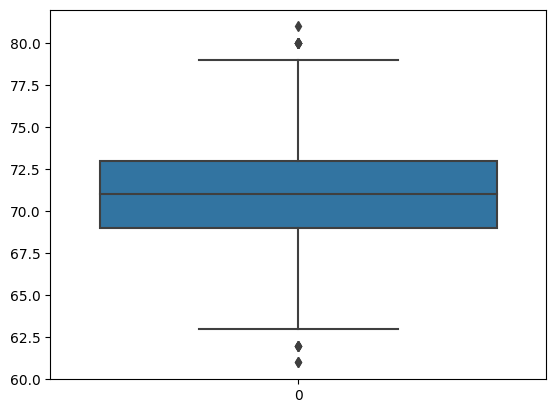

In [ ]:
sns.boxplot(df['Height'])

In [ ]:
#Handling Missing Values for Height
df.Height=df.Height.fillna(df.Height.median())   
df['Height'].isnull().sum()

0

In [ ]:
df['Height']=df['Height'].astype(float)

5. Column-'Weight'

Details-contain the suffix lbs

Required output-Remove the suffix and convert to float with decimal points

In [ ]:
df['Weight'].head()

0    161lbs
1    172lbs
2    198lbs
3    121lbs
4    176lbs
Name: Weight, dtype: object

In [ ]:
df.Weight.unique()

array(['161lbs', '172lbs', '198lbs', '121lbs', '176lbs', '207lbs',
       '152lbs', '165lbs', '170lbs', '157lbs', '179lbs', '174lbs',
       '190lbs', '154lbs', '187lbs', '146lbs', '141lbs', '148lbs',
       '139lbs', '168lbs', '163lbs', '183lbs', '159lbs', '150lbs',
       '209lbs', '143lbs', '137lbs', '192lbs', '134lbs', '181lbs',
       '194lbs', '123lbs', '185lbs', '132lbs', '201lbs', '196lbs', nan,
       '212lbs', '205lbs', '130lbs', '128lbs', '203lbs', '119lbs',
       '214lbs', '117lbs', '220lbs', '216lbs', '227lbs', '126lbs',
       '223lbs', '218lbs', '225lbs', '110lbs', '243lbs', '236lbs',
       '234lbs', '229lbs'], dtype=object)

In [ ]:
weights=['161lbs', '172lbs', '198lbs', '121lbs', '176lbs', '207lbs',
       '152lbs', '165lbs', '170lbs', '157lbs', '179lbs', '174lbs',
       '190lbs', '154lbs', '187lbs', '146lbs', '141lbs', '148lbs',
       '139lbs', '168lbs', '163lbs', '183lbs', '159lbs', '150lbs',
       '209lbs', '143lbs', '137lbs', '192lbs', '134lbs', '181lbs',
       '194lbs', '123lbs', '185lbs', '132lbs', '201lbs', '196lbs', 
       '212lbs', '205lbs', '130lbs', '128lbs', '203lbs', '119lbs',
       '214lbs', '117lbs', '220lbs', '216lbs', '227lbs', '126lbs',
       '223lbs', '218lbs', '225lbs', '110lbs', '243lbs', '236lbs',
       '234lbs', '229lbs']

In [ ]:
#Converting weight into float
def weight_fill(x):
    if x in weights:
        return float(x[:x.index('l')])

df['Weight']=df.Weight.apply(weight_fill)

<Axes: >

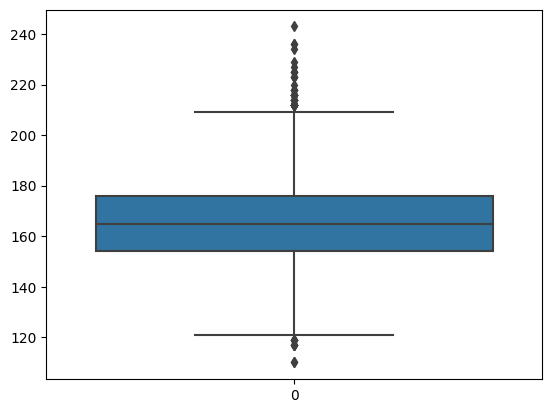

In [ ]:
sns.boxplot(df['Weight'])

In [ ]:
#Handling Missing Values for Weight
df.Weight=df.Weight.fillna(df.Weight.median())

In [ ]:
df.head(2)

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Penalties,Release Clause
0,240331,P. Camará,21,Guinea Bissau,58,69,220000.0,1000.0,Right,1.0,LS,"Jun 8, 2017",2019,73.0,161.0,58.0,429000.0
1,183465,J. Rodwell,27,England,68,68,925000.0,16000.0,Right,2.0,CM,"Aug 23, 2018",2019,74.0,172.0,57.0,1800000.0


6. Column-'Joined'

Details-Year as a string in some cases date as a string

Required output-Convert to int with only year



In [ ]:
df['Joined'].isnull().sum()

1164

In [ ]:
# here, 1164 players are loaned from other team and their values were NaN in joined column
# to convert object data type to datetime data type and extract year from the same, have filled year 1900 to replace NaN

In [ ]:
df['Joined'].fillna("1900", inplace = True)
df['Joined'].isnull().sum()

0

In [ ]:
df['Joined']= pd.to_datetime(df['Joined'])

In [ ]:
df['Joined'] = df['Joined'].dt.year
df['Joined'].value_counts()

2018    4934
2017    3240
2016    1663
1900    1164
2015    1013
2014     607
2013     344
2012     259
2011     151
2010      96
2009      55
2008      41
2007      28
2005      14
2006      12
2003      11
2004       9
2002       7
1998       3
2001       2
2000       2
1991       1
1999       1
Name: Joined, dtype: int64

In [ ]:
df['Joined']= df['Joined'].astype(int)

7. Column-'Contract Valid Until'

Details- date as a string

Required output-Convert to datetime type


In [ ]:
df['Contract Valid Until'].isnull().sum()

221

In [ ]:
df[df['Contract Valid Until'].isnull()]

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Penalties,Release Clause
47,233050,M. Smith,18,Wales,56,75,0.0,0.0,Right,1.0,CDM,1900,NaN,70.0,150.0,45.0,1300000.0
169,238205,A. Edathodika,31,India,62,62,0.0,0.0,Left,1.0,LCB,1900,NaN,72.0,172.0,37.0,1700000.0
182,226617,Jang Hyun Soo,25,Korea Republic,62,65,375000.0,2000.0,<NA>,NaN,<NA>,1900,NaN,71.0,165.0,NaN,1700000.0
227,228182,M. El-Shenawy,29,Egypt,66,68,0.0,0.0,Right,1.0,GK,1900,NaN,75.0,190.0,32.0,1700000.0
399,228192,E. Lyngdoh,31,India,56,56,0.0,0.0,Right,1.0,<NA>,1900,NaN,69.0,150.0,59.0,1300000.0
780,212518,B. Sangaré,32,Ivory Coast,69,69,0.0,0.0,Right,1.0,GK,1900,NaN,71.0,172.0,19.0,1700000.0
782,245564,Vinicius,19,Brazil,62,77,525000.0,1000.0,<NA>,NaN,<NA>,1900,NaN,71.0,165.0,NaN,1700000.0
798,193772,A. Kovácsik,27,Hungary,69,70,0.0,0.0,Right,1.0,GK,1900,NaN,76.0,179.0,33.0,1700000.0
835,201698,M. Pátkai,30,Hungary,70,70,0.0,0.0,Right,1.0,CDM,1900,NaN,68.0,141.0,47.0,1700000.0
849,175393,J. Arce,33,Bolivia,68,68,0.0,0.0,Left,1.0,<NA>,1900,NaN,69.0,154.0,69.0,1700000.0


In [ ]:
#Here,'contract valid until' are NaN where 'joined' is 1900.
# to convert object data type of 'contract valid until' to datetime data type and extract year from the same, have filled year 1900 to replace NaN

In [ ]:
df['Contract Valid Until'].fillna("1900", inplace = True)
df['Contract Valid Until'].isnull().sum()

0

In [ ]:
df['Contract Valid Until']= pd.to_datetime(df['Contract Valid Until'])

In [ ]:
df['Contract Valid Until'].value_counts()

2019-01-01    3665
2021-01-01    3255
2020-01-01    3042
2022-01-01    1122
2023-01-01     774
2019-06-30     697
2018-01-01     655
1900-01-01     221
2018-12-31     102
2019-05-31      42
2024-01-01      19
2020-06-30      10
2019-01-31       9
2019-01-05       6
2019-01-12       4
2019-10-14       4
2019-01-25       3
2019-01-02       3
2019-01-07       3
2019-12-31       3
2019-01-06       2
2019-12-01       2
2020-05-31       2
2025-01-01       2
2020-02-27       1
2026-01-01       1
2019-06-01       1
2018-11-30       1
2019-01-30       1
2019-01-03       1
2019-01-11       1
2019-05-04       1
2019-01-20       1
2019-01-15       1
Name: Contract Valid Until, dtype: int64

In [ ]:
df.dtypes

ID                                  string
Name                                string
Age                                  int64
Nationality                         string
Overall                              int64
Potential                            int64
Value                              float64
Wage                               float64
Preferred Foot                      string
International Reputation           float64
Position                            string
Joined                               int64
Contract Valid Until        datetime64[ns]
Height                             float64
Weight                             float64
Penalties                          float64
Release Clause                     float64
dtype: object

In [ ]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Penalties,Release Clause
0,240331,P. Camará,21,Guinea Bissau,58,69,220000.0,1000.0,Right,1.0,LS,2017,2019-01-01,73.0,161.0,58.0,429000.0
1,183465,J. Rodwell,27,England,68,68,925000.0,16000.0,Right,2.0,CM,2018,2019-01-01,74.0,172.0,57.0,1800000.0
2,205186,P. Gazzaniga,26,Argentina,74,78,5000000.0,46000.0,Right,1.0,GK,2017,2022-01-01,77.0,198.0,41.0,9600000.0
3,233531,Y. Soteldo,21,Venezuela,71,81,3800000.0,6000.0,Right,1.0,CAM,2018,2018-01-01,63.0,121.0,71.0,6100000.0
4,243718,R. Koot,18,Netherlands,56,68,120000.0,1000.0,Right,1.0,GK,2016,2020-01-01,73.0,176.0,15.0,198000.0


In [ ]:
df.corr()

,Age,Overall,Potential,Value,Wage,International Reputation,Joined,Height,Weight,Penalties,Release Clause
Age,1.000000,0.456111,-0.252999,0.078692,0.144274,0.255095,0.059285,0.076822,0.226316,0.147738,0.069881
Overall,0.456111,1.000000,0.657875,0.626803,0.572853,0.495957,-0.049722,0.038778,0.154376,0.343262,0.614366
Potential,-0.252999,0.657875,1.000000,0.574155,0.485902,0.368923,-0.092139,-0.005334,-0.005255,0.223384,0.570673
Value,0.078692,0.626803,0.574155,1.000000,0.859262,0.647208,0.007397,0.005747,0.047942,0.239116,0.983521
Wage,0.144274,0.572853,0.485902,0.859262,1.000000,0.673206,-0.028962,0.025695,0.071288,0.221359,0.839765
International Reputation,0.255095,0.495957,0.368923,0.647208,0.673206,1.000000,0.001483,0.032316,0.086230,0.215286,0.623713
Joined,0.059285,-0.049722,-0.092139,0.007397,-0.028962,0.001483,1.000000,0.000371,0.001847,-0.042743,0.008493
Height,0.076822,0.038778,-0.005334,0.005747,0.025695,0.032316,0.000371,1.000000,0.753195,-0.344898,0.006090
Weight,0.226316,0.154376,-0.005255,0.047942,0.071288,0.086230,0.001847,0.753195,1.000000,-0.258762,0.043579
Penalties,0.147738,0.343262,0.223384,0.239116,0.221359,0.215286,-0.042743,-0.344898,-0.258762,1.000000,0.229880


# 5. Check the variation of the features.If you are performing variance and standard deviation,Kindly explain why the variances of the variables are higher than the standard deviation.Based on this analysis decide which feature is not needed

In [ ]:
df.var()

Age                         2.157549e+01
Overall                     4.763576e+01
Potential                   3.738750e+01
Value                       3.075610e+13
Wage                        4.787468e+08
International Reputation    1.508923e-01
Joined                      1.061628e+03
Height                      6.959912e+00
Weight                      2.425805e+02
Penalties                   2.469373e+02
Release Clause              1.107643e+14
dtype: float64

In [ ]:
df.std()

Age                                             4.644942
Overall                                         6.901866
Potential                                       6.114532
Value                                     5545818.515698
Wage                                        21880.283501
International Reputation                        0.388449
Joined                                         32.582626
Contract Valid Until        5557 days 11:13:27.710196160
Height                                          2.638164
Weight                                         15.574996
Penalties                                       15.71424
Release Clause                           10524460.261239
dtype: object

In [ ]:
# The data appears to be right as std is sqrt of variance and hence variance is greater than std.

In [ ]:
#Columns like International Reputation is categorical and Joined_year and Contract Valid Until are dates.So,excluding them,
#Variances of Height and Age are negligible.Hence,we can conclude that,these variables/features are not needed.

# 6. Check for missing values and do imputations where necessary.Note: Do the appropriate imputation based on the distribution.

In [ ]:
df.isnull().sum()

ID                           0
Name                         0
Age                          0
Nationality                  0
Overall                      0
Potential                    0
Value                        0
Wage                         0
Preferred Foot              36
International Reputation    36
Position                    47
Joined                       0
Contract Valid Until         0
Height                       0
Weight                       0
Penalties                   36
Release Clause               0
dtype: int64

In [ ]:
#preferred-foot
df['Preferred Foot'].value_counts()

Right    10447
Left      3174
Name: Preferred Foot, dtype: Int64

In [ ]:
#As Right foot>Left foot,we can replace 36 null values with 'Right foot'

In [ ]:
df['Preferred Foot'].replace(np.nan,"Right",inplace=True)

In [ ]:
df['Preferred Foot'].isnull().sum()

0

In [ ]:
df['International Reputation'].value_counts()

1.0    12428
2.0      928
3.0      224
4.0       37
5.0        4
Name: International Reputation, dtype: int64

In [ ]:
#As 'International Reputation'=1 has highest counts.we will replace null values with 1.0

In [ ]:
df['International Reputation'].replace(np.nan,1.0,inplace=True)

In [ ]:
df['International Reputation'].isnull().sum()

0

In [ ]:
df['Position'].unique()

<StringArray>
[ 'LS',  'CM',  'GK', 'CAM',  'ST', 'RCB', 'RCM',  'CB',  'RB',  'RM', 'CDM',
 'LCM',  'LM',  'RW',  'LB', 'LCB', 'RWB',  'LW',  'RS', 'RDM', 'LDM',  <NA>,
  'CF',  'RF',  'LF', 'LAM', 'RAM', 'LWB']
Length: 28, dtype: string

In [ ]:
df['Position'].value_counts()

ST     1575
GK     1531
CB     1327
CM     1069
LB      978
RB      973
RM      839
LM      821
CAM     742
CDM     721
LCB     484
RCB     478
RCM     299
LCM     291
LW      280
RW      274
LDM     189
RDM     183
RS      166
LS      155
RWB      65
LWB      60
CF       54
RAM      17
LAM      14
LF       13
RF       12
Name: Position, dtype: Int64

In [ ]:
#As Position=ST has highest counts,we can replace null values with 'ST'

In [ ]:
df['Position'].replace(np.nan,"ST",inplace=True)

In [ ]:
df['Position'].isnull().sum()

0

In [ ]:
df['Penalties'].unique()

array([58., 57., 41., 71., 15., 50., 70., 42., 23., 72., 49., 35., 36.,
       40., 74., 21., 44., 54., 59., 43., 48., 52., 39., 67., 68., 28.,
       34., 65., 60., 45., 12., 17., 51., 64., 33., 37., 69., 56., 24.,
       73., 61., 53., 77., 75., 55., 63., 66., 47., 46., 38., 11., 18.,
       13., 30., 27., 62., 80., 14., 16., 22., nan, 25., 20., 84., 32.,
       19., 79., 31., 26., 29., 81., 78., 76., 85., 88., 10., 86., 90.,
       83.,  8.,  9.,  5., 82., 89., 87.,  7.])

<Axes: xlabel='Penalties'>

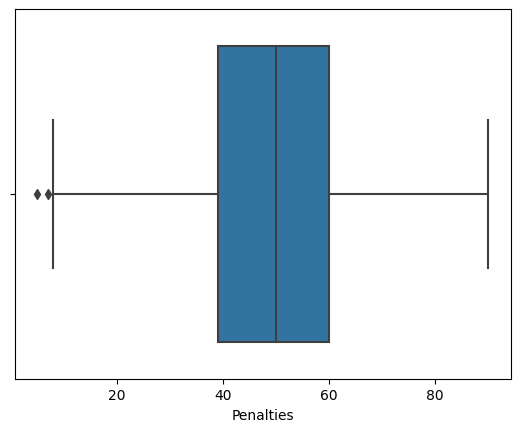

In [ ]:
sns.boxplot(x='Penalties',data=df)

In [ ]:
Q1 = df['Penalties'].quantile(0.25)
Q3 = df['Penalties'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

21.0


In [ ]:
np.where((df['Penalties'] < (Q1 - 1.5 * IQR)) | (df['Penalties']> (Q3 + 1.5 * IQR)))

(array([3305, 9988]),)

In [ ]:
#As 'Penalties' has only 2 outliers,removing both will not affect much.

In [ ]:
df1 = df[~((df['Penalties'] < (Q1 - 1.5 * IQR)) | (df['Penalties'] > (Q3 + 1.5 * IQR)))]

In [ ]:
np.where((df1['Penalties'] < (Q1 - 1.5 * IQR)) | (df1['Penalties']> (Q3 + 1.5 * IQR)))

(array([], dtype=int64),)

In [ ]:
df1['Penalties'].isnull().sum()

36

<Axes: xlabel='Penalties'>

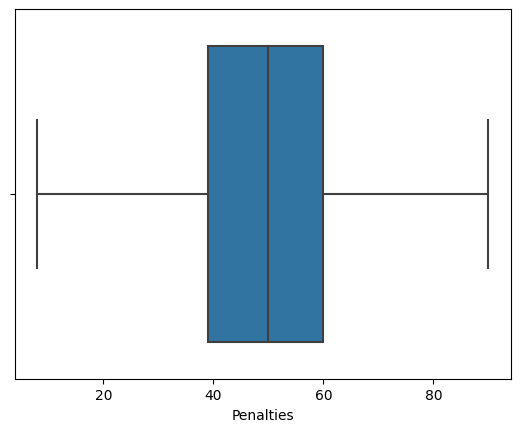

In [ ]:
sns.boxplot(x='Penalties',data=df1)

In [ ]:
#No outliers present,so now we can replace null values with mean of the variable.

In [ ]:
df1['Penalties'].replace(np.nan,df1['Penalties'].mean(),inplace=True)

In [ ]:
df1.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Penalties                   0
Release Clause              0
dtype: int64

In [ ]:
#All null values are removed from the data.

#7. find out If there is any player above 2.0*IQR – Q1 and below 2.0*IQR + Q3. What would happen if the data has above or below the mentioned values and display the names of the players?

In [ ]:
df1.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Position',
       'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Penalties',
       'Release Clause'],
      dtype='object')

In [ ]:
cols = ['Age','Overall','Potential','Wage','Contract Valid Until','Height','Weight','Penalties','Value','Release Clause']

In [ ]:
for i in cols:
  print(i)
  Q1 = df1[i].quantile(0.25)
  Q3 = df1[i].quantile(0.75)
  IQR = Q3 - Q1
  print(df1[(df1[i] < (Q1 - 2.0 * IQR)) | (df1[i]> (Q3 + 2.0 * IQR))]['Name'])

Age
2577         O. Pérez
5356    K. Pilkington
Name: Name, dtype: string
Overall
945              E. Hazard
1832     Cristiano Ronaldo
4491             L. Suárez
4781          K. De Bruyne
5189             Neymar Jr
5737             L. Modrić
10639         Sergio Ramos
10748             J. Oblak
11456       R. Lewandowski
12266               De Gea
12421             D. Godín
Name: Name, dtype: string
Potential
1832     Cristiano Ronaldo
2757           Y. Uchimura
4781          K. De Bruyne
5177             P. Dybala
5189             Neymar Jr
5356         K. Pilkington
7841           M. Škriniar
8705             K. Mbappé
8947           J. Miszczuk
10748             J. Oblak
11077      Vinícius Júnior
11481        Gabriel Jesus
12266               De Gea
12530            S. Umtiti
13467              L. Sané
Name: Name, dtype: string
Wage
2                 P. Gazzaniga
6                 Z. Junuzović
11                     F. Fajr
13                   M. Zárate
19                  O. Al

#8. Check the Categorical variables and Find if there is any data imbalance in any column also find if any cardinality problem exists.


<Axes: >

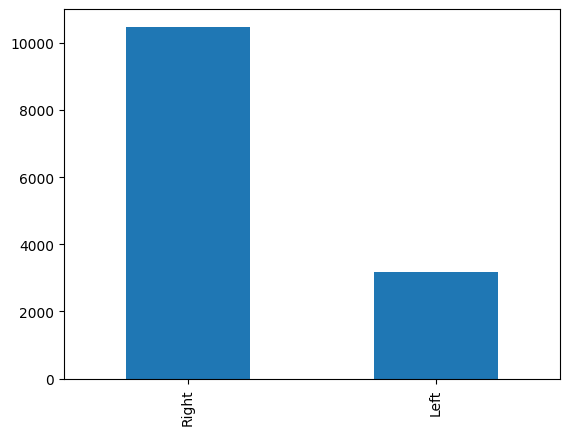

In [ ]:
df1['Preferred Foot'].value_counts().plot(kind="bar")

In [ ]:
# From the above graph we can imply that Preferred foot is imbalanced 

<Axes: >

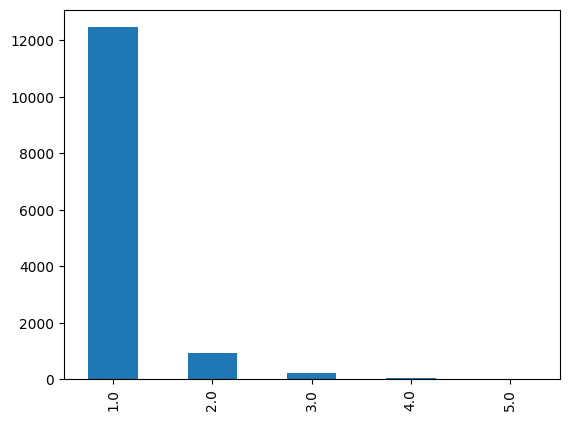

In [ ]:
df1['International Reputation'].value_counts().plot(kind="bar")

In [ ]:
# There is very huge imbalance in Internation reputation.

<Axes: >

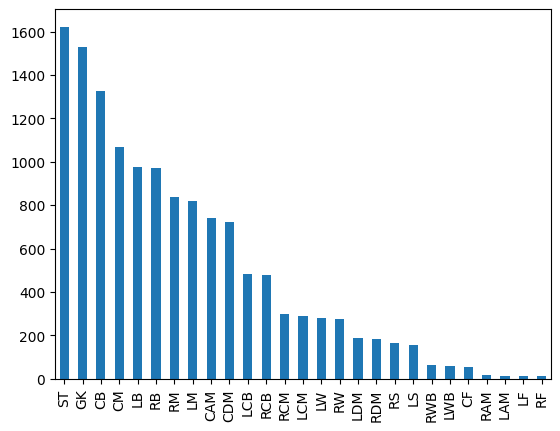

In [ ]:
df1['Position'].value_counts().plot(kind="bar")

<Axes: >

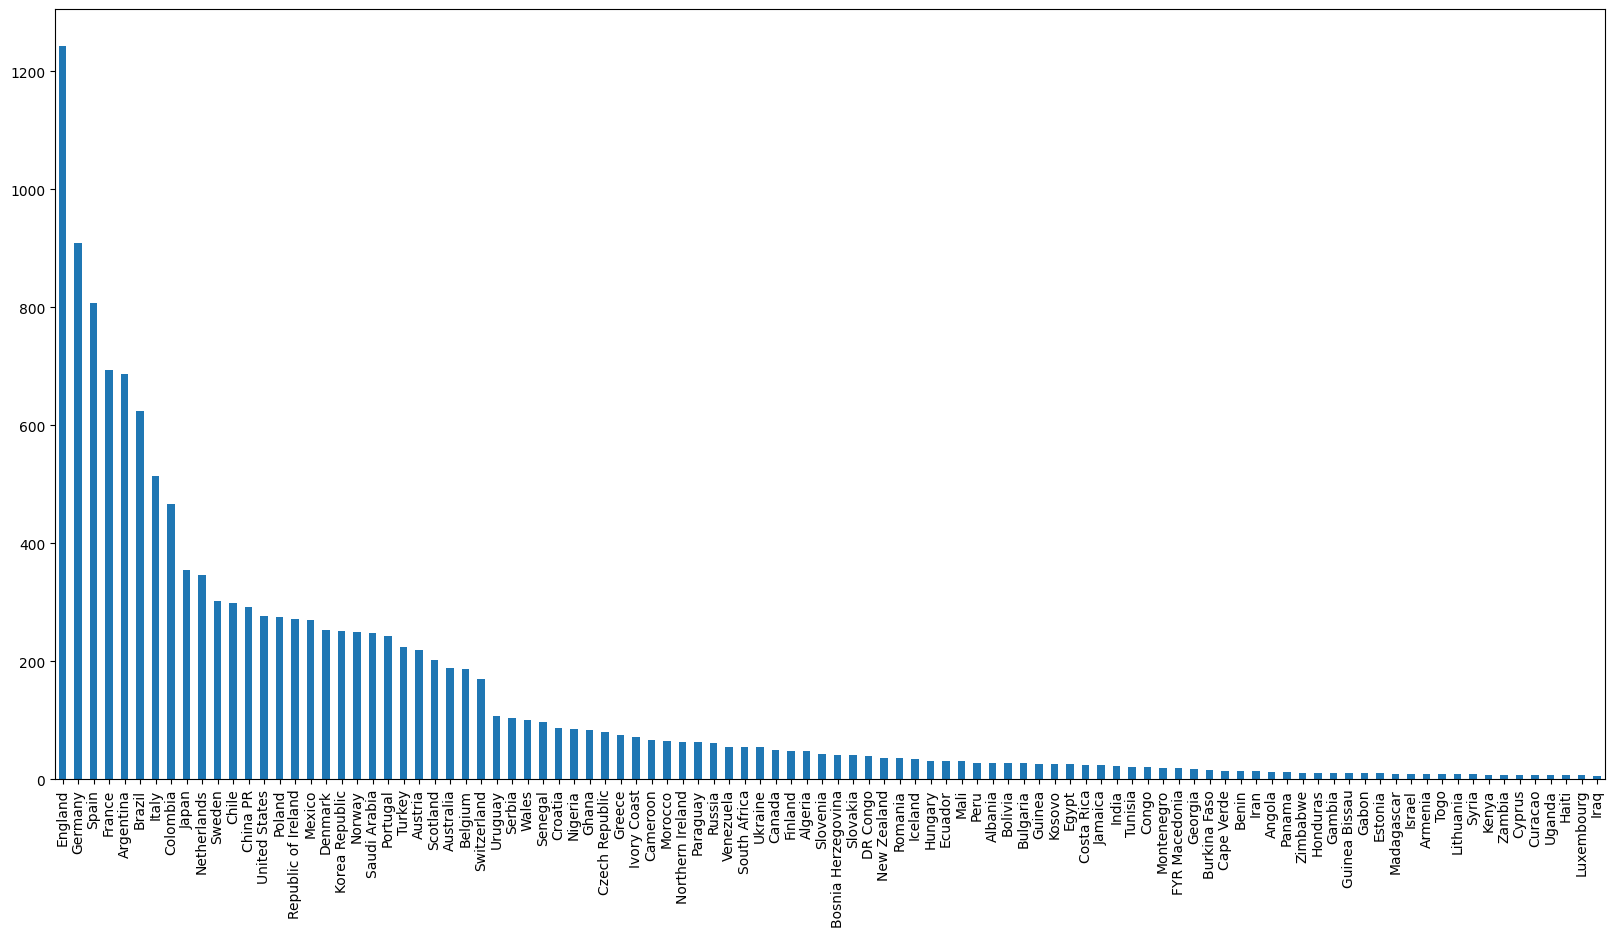

In [ ]:
plt.figure(figsize=(20,10))
df1['Nationality'].value_counts()[:100].plot(kind="bar")

In [ ]:
# From the above graph we have considered 100 rows out of 25490 and we can see there is skewness and imbalance in the data
# Out of all the categorical column Nationality has the more number of unique values hence we can conclude that this has highest cardinality

#9. Generate pair plots for the following variables:Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

In [ ]:
col1 = ['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']

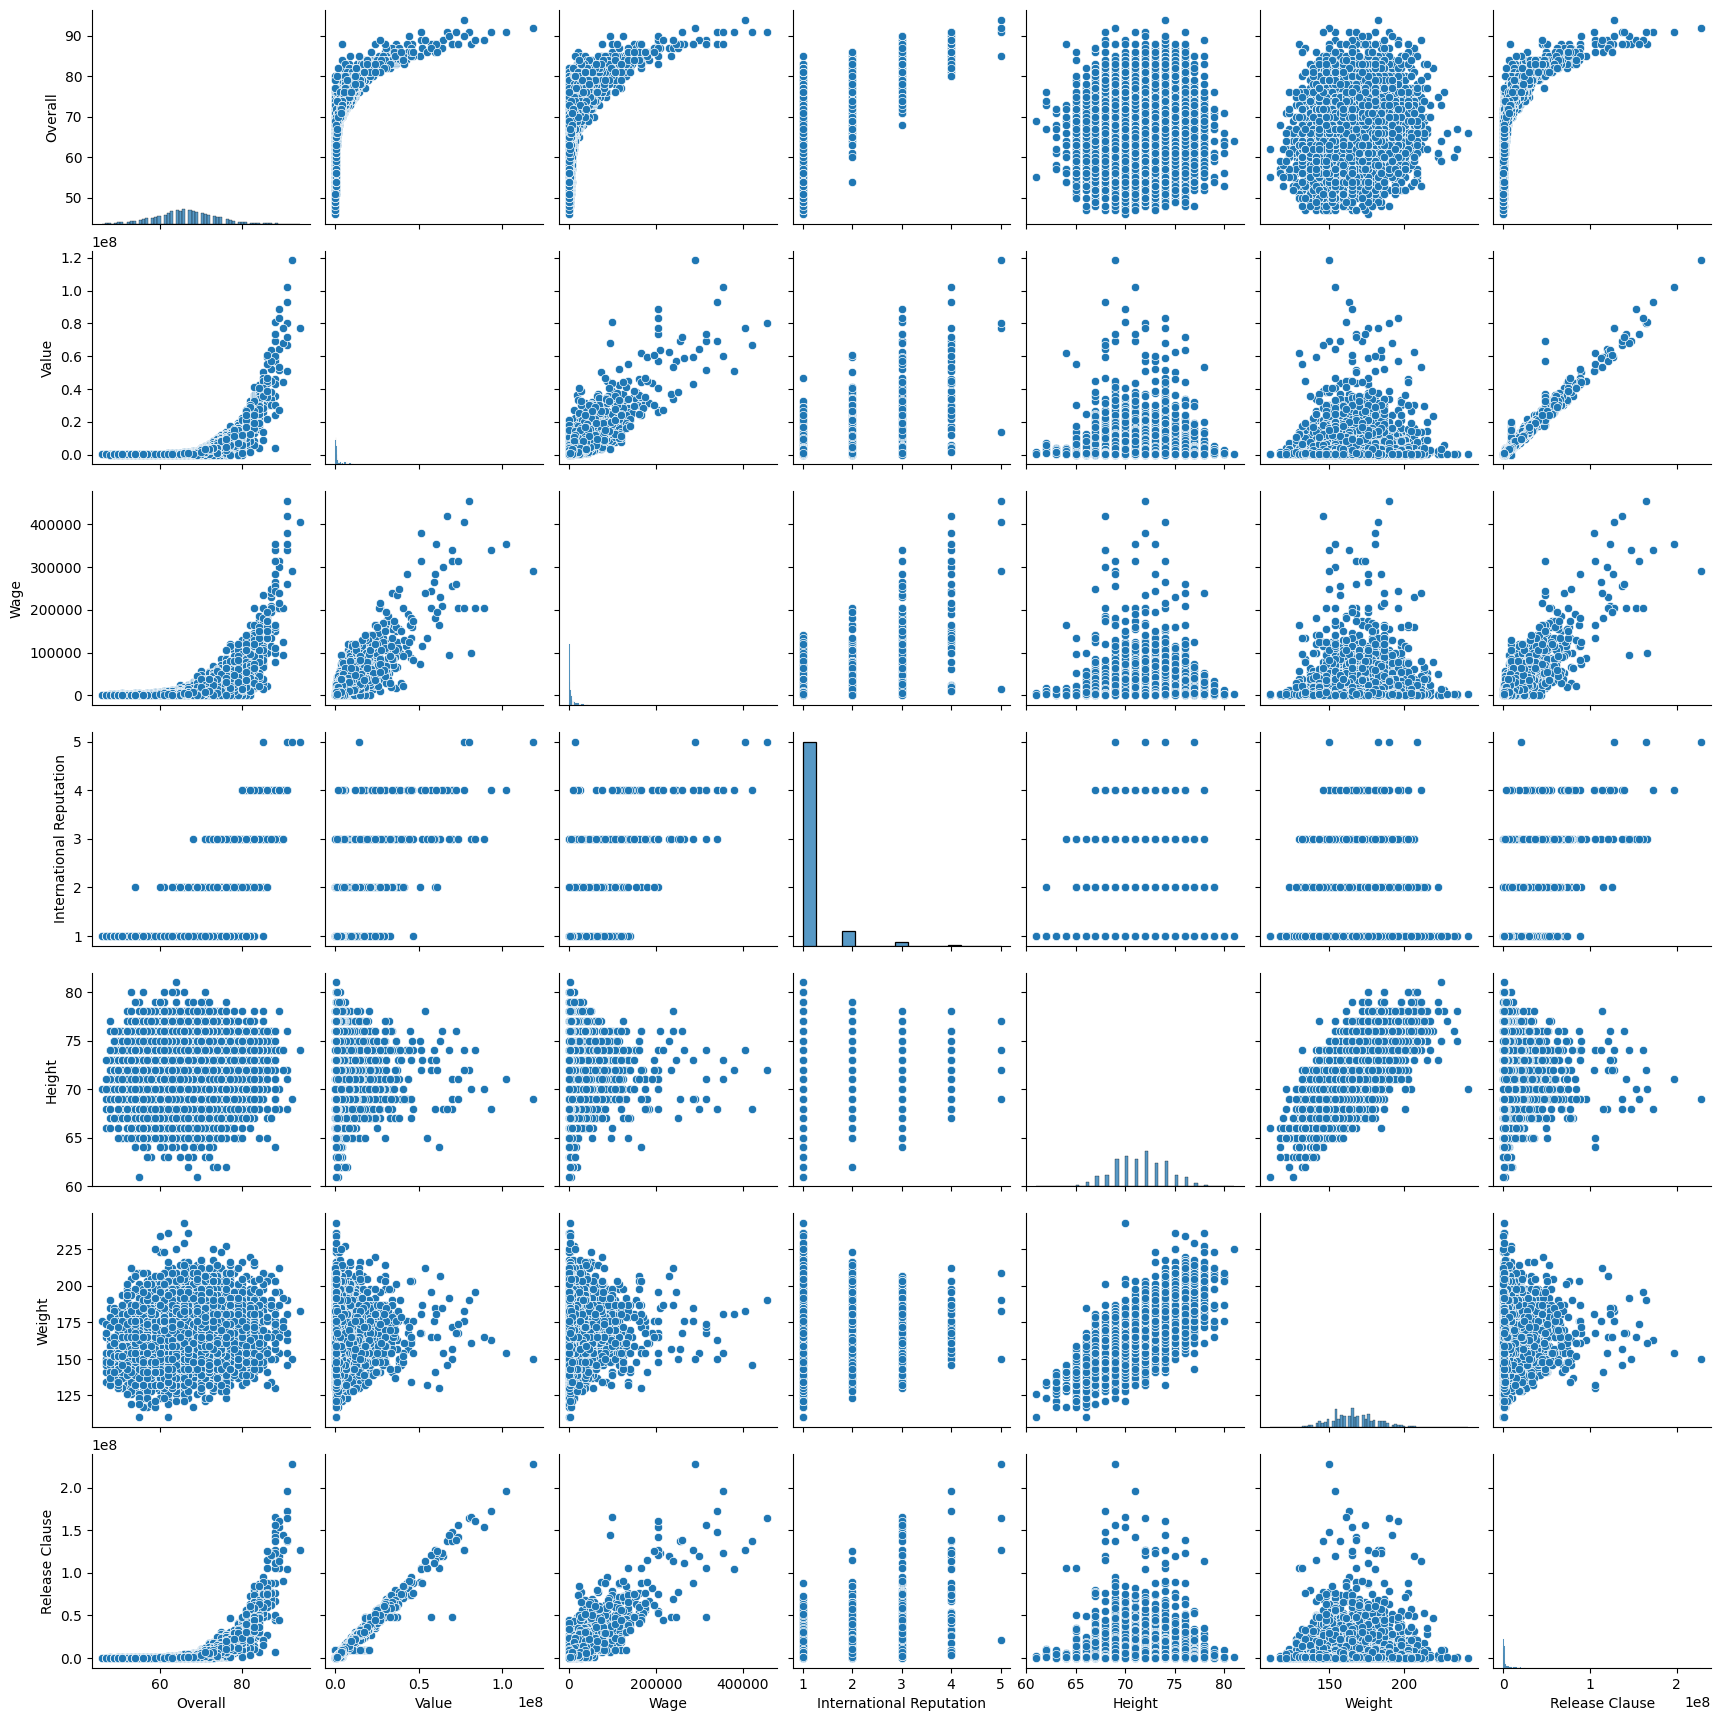

In [ ]:
sns.pairplot(df1[col1])
plt.show()

#10. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [ ]:
top_20 = df1[df1['Contract Valid Until'] == '2020'].sort_values(by=['Overall'], ascending=False).head(20)

In [ ]:
top_20

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Penalties,Release Clause
12266,193080,De Gea,27,Spain,91,93,72000000.0,260000.0,Right,4.0,GK,2011,2020-01-01,76.0,168.0,40.0,138600000.0
10639,155862,Sergio Ramos,32,Spain,91,91,51000000.0,380000.0,Right,4.0,RCB,2005,2020-01-01,72.0,181.0,75.0,104600000.0
5737,177003,L. Modrić,32,Croatia,91,91,67000000.0,420000.0,Right,4.0,RCM,2012,2020-01-01,68.0,146.0,82.0,137400000.0
945,183277,E. Hazard,27,Belgium,91,91,93000000.0,340000.0,Right,4.0,LF,2012,2020-01-01,68.0,163.0,86.0,172100000.0
12262,138956,G. Chiellini,33,Italy,89,89,27000000.0,215000.0,Left,4.0,LCB,2005,2020-01-01,74.0,187.0,50.0,44600000.0
9742,164240,Thiago Silva,33,Brazil,88,88,24000000.0,165000.0,Right,4.0,RCB,2012,2020-01-01,72.0,181.0,60.0,44400000.0
5045,190460,C. Eriksen,26,Denmark,88,91,73500000.0,205000.0,Right,3.0,CAM,2013,2020-01-01,71.0,168.0,67.0,141500000.0
7038,189332,Jordi Alba,29,Spain,87,87,38000000.0,250000.0,Left,3.0,LB,2012,2020-01-01,67.0,150.0,59.0,77900000.0
9708,193041,K. Navas,31,Costa Rica,87,87,30500000.0,195000.0,Right,3.0,GK,2014,2020-01-01,73.0,176.0,25.0,62500000.0
7286,175943,D. Mertens,31,Belgium,87,87,45000000.0,135000.0,Right,3.0,RF,2013,2020-01-01,67.0,134.0,79.0,76500000.0


In [ ]:
#1. What would the average wage for this set of players be?
top_20['Wage'].mean()

181550.0

In [ ]:
#2. What is the average age?
top_20['Age'].mean()

30.25

In [ ]:
df1.dtypes

ID                                  string
Name                                string
Age                                  int64
Nationality                         string
Overall                              int64
Potential                            int64
Value                              float64
Wage                               float64
Preferred Foot                      string
International Reputation           float64
Position                            string
Joined                               int64
Contract Valid Until        datetime64[ns]
Height                             float64
Weight                             float64
Penalties                          float64
Release Clause                     float64
dtype: object

In [ ]:
#3. Is there a correlation between the Overall rating and Value for these players? If Yes what kind of relationship that the features have, 
#also explain why this kind of relationship could happen
top_20.corr()

,Age,Overall,Potential,Value,Wage,International Reputation,Joined,Height,Weight,Penalties,Release Clause
Age,1.000000,-0.117743,-0.304855,-0.593162,-0.189339,0.229022,-0.045369,0.289342,0.241926,0.178777,-0.575265
Overall,-0.117743,1.000000,0.948009,0.754028,0.882217,0.820061,-0.532796,-0.119184,-0.189428,0.157229,0.763470
Potential,-0.304855,0.948009,1.000000,0.808944,0.802835,0.700540,-0.490011,-0.056086,-0.172179,0.026348,0.821334
Value,-0.593162,0.754028,0.808944,1.000000,0.733322,0.449486,-0.203178,-0.360404,-0.426094,0.298922,0.990696
Wage,-0.189339,0.882217,0.802835,0.733322,1.000000,0.728976,-0.483174,-0.352414,-0.257489,0.187534,0.755415
International Reputation,0.229022,0.820061,0.700540,0.449486,0.728976,1.000000,-0.420745,-0.022589,-0.019656,0.218357,0.432526
Joined,-0.045369,-0.532796,-0.490011,-0.203178,-0.483174,-0.420745,1.000000,0.077105,0.034594,-0.007764,-0.231520
Height,0.289342,-0.119184,-0.056086,-0.360404,-0.352414,-0.022589,0.077105,1.000000,0.791210,-0.439233,-0.363041
Weight,0.241926,-0.189428,-0.172179,-0.426094,-0.257489,-0.019656,0.034594,0.791210,1.000000,-0.463213,-0.444960
Penalties,0.178777,0.157229,0.026348,0.298922,0.187534,0.218357,-0.007764,-0.439233,-0.463213,1.000000,0.296930


<Axes: >

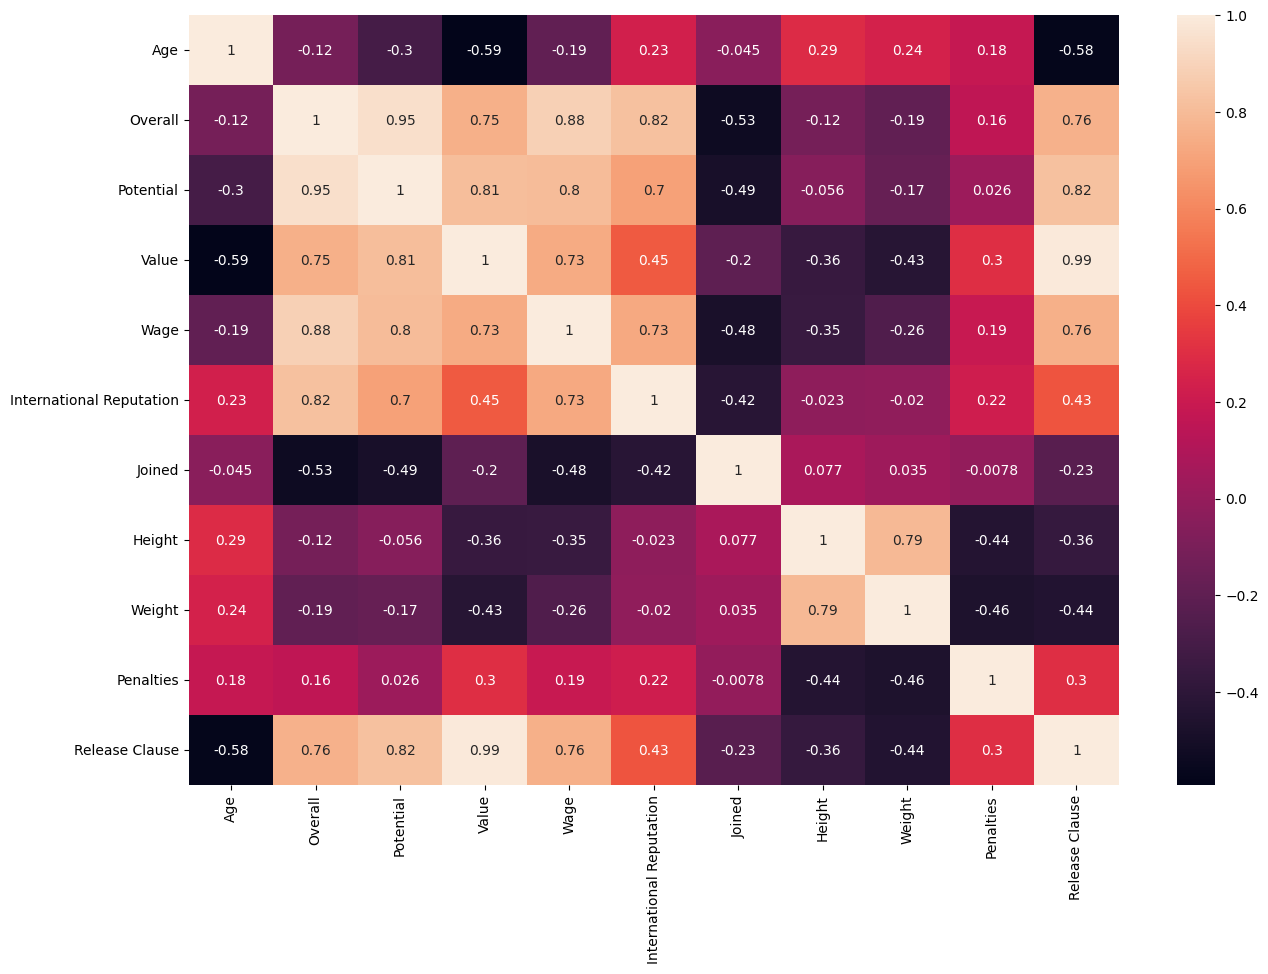

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(top_20.corr(),annot=True)

In [ ]:
top_20[['Overall','Value']].corr()

,Overall,Value
Overall,1.000000,0.754028
Value,0.754028,1.000000


In [ ]:
#If a player's overall rating in fifa is good,then,automatically,his value among other players will also improve.
#Hence,we can say that there is positive correlation between 'overall' and 'value'.

<Axes: xlabel='Overall', ylabel='Value'>

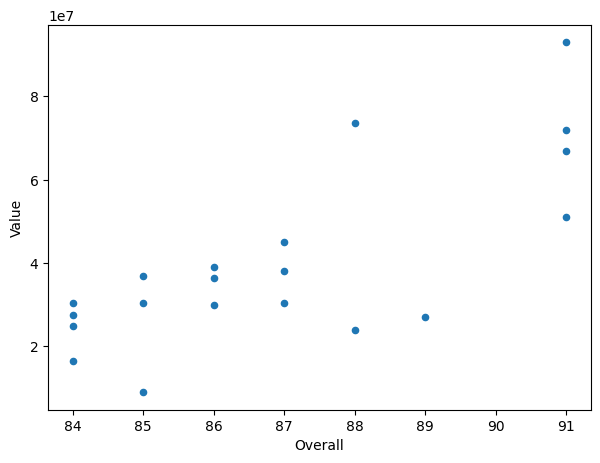

In [ ]:
top_20.plot.scatter(x='Overall', y='Value', marker='o', figsize=(7,5))


#11. Generate tables containing the top 5 players by Overall rating for each unique position.

In [ ]:
df2 = df1.sort_values(['Overall'],ascending=False).groupby('Position').head(5)

In [ ]:
df2.head()

,ID,Name,Age,Nationality,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Penalties,Release Clause
1832,20801,Cristiano Ronaldo,33,Portugal,94,94,77000000.0,405000.0,Right,5.0,ST,2018,2022-01-01,74.0,183.0,85.0,127100000.0
5189,190871,Neymar Jr,26,Brazil,92,93,118500000.0,290000.0,Right,5.0,LW,2017,2022-01-01,69.0,150.0,81.0,228100000.0
5737,177003,L. Modrić,32,Croatia,91,91,67000000.0,420000.0,Right,4.0,RCM,2012,2020-01-01,68.0,146.0,82.0,137400000.0
4491,176580,L. Suárez,31,Uruguay,91,91,80000000.0,455000.0,Right,5.0,RS,2014,2021-01-01,72.0,190.0,85.0,164000000.0
945,183277,E. Hazard,27,Belgium,91,91,93000000.0,340000.0,Right,4.0,LF,2012,2020-01-01,68.0,163.0,86.0,172100000.0


In [ ]:
df3 = df2.groupby('Position').agg({"Name":lambda s: s.unique().tolist()})
print('Grouped df',df3)

Grouped df                                                        Name
Position                                                   
CAM       [C. Eriksen, T. Müller, M. Özil, R. Nainggolan...
CB        [D. Godín, S. Umtiti, M. Benatia, N. Otamendi,...
CDM       [Sergio Busquets, Casemiro, William Carvalho, ...
CF        [Raffael, A. Milik, L. Stindl, Ricardo Goulart...
CM        [S. Milinković-Savić, Jorginho, I. Gündoğan, C...
GK        [De Gea, J. Oblak, T. Courtois, G. Buffon, H. ...
LAM       [J. Rodríguez, D. Tadić, Fabrio Farinha, Nicol...
LB        [Marcelo, Jordi Alba, Alex Sandro, Marcos Alon...
LCB       [G. Chiellini, M. Hummels, J. Vertonghen, V. v...
LCM       [M. Verratti, Bruno Fernandes, D. Alli, K. Kam...
LDM       [Paulinho, Marquinhos, Lucas Leiva, C. Arángui...
LF        [E. Hazard, P. Dybala, Iniesta, Jonathan Viera...
LM        [P. Aubameyang, Douglas Costa, M. Reus, Y. Bra...
LS        [G. Higuaín, Diego Costa, A. Gómez, Gerard Mor...
LW         [Neymar Jr, Isco, 

In [ ]:
df3['Name'].value_counts()

[C. Eriksen, T. Müller, M. Özil, R. Nainggolan, A. Vidal]                    1
[Neymar Jr, Isco, Coutinho, L. Insigne, L. Sané]                             1
[S. Coleman, M. Ginter, P. Kadeřábek, R. Aguilar, K. Lala]                   1
[Bernardo Silva, R. Mahrez, Willian, Ronaldo Cabrais, T. Werner]             1
[L. Suárez, Z. Ibrahimović, Falcao, W. Ben Yedder, Sergi Enrich]             1
[K. Mbappé, M. Salah, A. Di María, José Callejón, Quaresma]                  1
[D. Mertens, D. Valeri, L. Podolski, C. Falletti, Zhang Xizhe]               1
[P. Pogba, Illarramendi, D. De Rossi, I. Gueye, M. Parolo]                   1
[L. Modrić, K. De Bruyne, Parejo, S. Khedira, J. Kimmich]                    1
[Sergio Ramos, Thiago Silva, Piqué, T. Alderweireld, L. Bonucci]             1
[Azpilicueta, K. Walker, Carvajal, L. Bender, A. Florenzi]                   1
[J. Cuadrado, H. Ziyech, Allan Bardinho, Kauã Abranches, Sebas Couteira]     1
[Jonny, Granell, J. Mojica, B. Oczipka, Aday Benítez

In [ ]:
list1 = df3['Name'].value_counts().keys()

In [ ]:
#1. Are there any players appearing at more than one table? Please point out such players.
resultant_dict = []

for i in range(0,len(df3)):
  for j in range(0,len(df3)):
    if df3['Name'][i] == df3['Name'][j]:
      print('yes')
    else:
      val = set(df3['Name'][i]).intersection(set(df3['Name'][j]))
      if val == set():
        print('no matching')
      else:
        newVal = {'Name':val}
        resultant_dict.append(newVal)
print(resultant_dict)

yes
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
yes
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
yes
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
no matching
yes
no matching


In [ ]:
#2. What is the average wage one can expect to pay for the top 5 in every position?

df4 = df2.groupby('Position').agg({"Wage":lambda s: sum(s)/5})
print('The average wage that can be expected in each position is: \n',df4)

The average wage that can be expected in each position is: 
               Wage
Position          
CAM       168000.0
CB        139600.0
CDM       179400.0
CF         42000.0
CM        121600.0
GK        164200.0
LAM        81800.0
LB        184600.0
LCB       155400.0
LCM        75000.0
LDM       105800.0
LF        123200.0
LM        135600.0
LS        114200.0
LW        261000.0
LWB        32800.0
RAM        46600.0
RB        136000.0
RCB       219000.0
RCM       218600.0
RDM       105000.0
RF         38600.0
RM        133000.0
RS        129400.0
RW        136200.0
RWB        41200.0
ST        294000.0


**STATISTICAL ANALYSIS**





#1. Test statistically whether the Left-hand player’s overall rating is higher than the Right-hand overall score. Alpha = 0.05.Before checking the test, Kindly make sure data is normally distributed.

In [ ]:
# H0: left hand player overall score <= right hand player overall score
# H1: left hand player overall score > right hand player overall score
from scipy.stats import shapiro
dataLeft = df1[df1['Preferred Foot'] == 'Left']['Overall']
dataRight = df1[df1['Preferred Foot'] == 'Right']['Overall']
# print(len(dataLeft),len(dataRight))
alpha = 0.05

# Check for normality using shapiro wilk test
stat,p_value = shapiro(df1['Overall'])
lstat, lp_value = shapiro(dataLeft)
rstat, rp_value = shapiro(dataRight)

# print the test statistic and corresponding p-value 
print('Test statistic for left hand player overall score:', lstat)
print('P-Value for left hand player overall score:', lp_value)
print('\n')
print('Test statistic for right hand player overall score:', rstat)
print('P-Value for right hand player overall score:', rp_value)
print('\n')
print('Test statistic for overall score:', stat)
print('P-Value for overall score:', p_value)

dataLeft_mean = np.mean(dataLeft)
dataRight_mean = np.mean(dataRight)

dataLeft.describe()
dataRight.describe()

Test statistic for left hand player overall score: 0.9951341152191162
P-Value for left hand player overall score: 9.87370629701445e-09


Test statistic for right hand player overall score: 0.996647834777832
P-Value for right hand player overall score: 9.773997881662097e-15


Test statistic for overall score: 0.9966086745262146
P-Value for overall score: 3.497909905959319e-17


count    10481.000000
mean        66.049995
std          7.007669
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

<Axes: xlabel='Overall', ylabel='Density'>

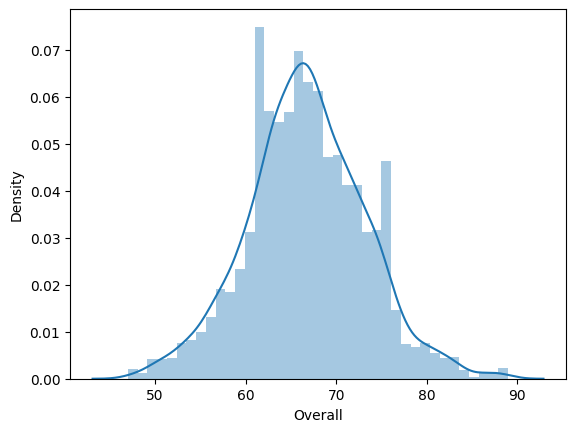

In [ ]:
sns.distplot(dataLeft)

<Axes: xlabel='Overall', ylabel='Density'>

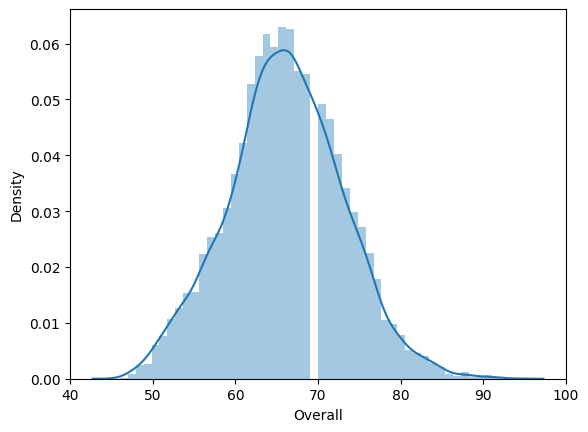

In [ ]:
sns.distplot(dataRight)

<Axes: xlabel='Overall', ylabel='Density'>

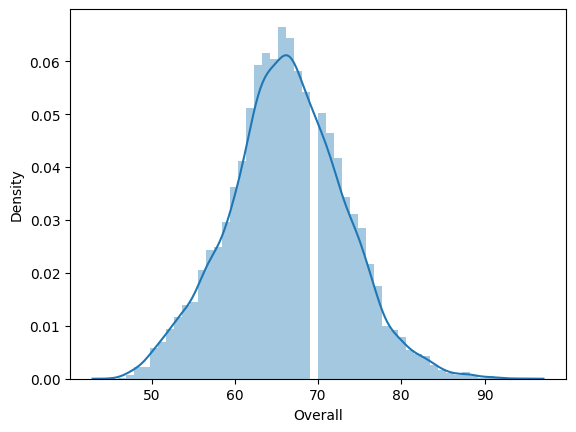

In [ ]:
sns.distplot(df1['Overall'])

From the above result, we can see that the p-value is less than 0.05, thus we can say that the overall scores of the players of left and right both are not normally distributed but the graph shows that the distribution is normal.This condition when distribution is normal but p-val< alpha, this is called as Type 1 error and the possible reason for this is that, p values are uniformly distributed.

#2. Does the age factor affect the player’s potential? Check the claim that the players who are greater than 35, their potential will be lesser than those whose age is less than 35. 
Alpha = 0.05

In [ ]:
# H0: age greater than 35 have less potential >= age less than 35 have more potential
# H1: age greater than 35 have less potential < age less than 35 have more potential

ageGreater35 = df1[(df1['Age'] >= 35)]['Potential']
n_1 = len(ageGreater35)
nl_mean = np.mean(ageGreater35)
nl_std = np.std(ageGreater35)

ageLesser35 = df1[(df1['Age'] < 35)]['Potential']
n_2 = len(ageLesser35)
n2_mean = np.mean(ageLesser35)
n2_std = np.std(ageLesser35)

In [ ]:
#Testing normality of data
stat, p_value = shapiro(df1['Potential'])   
print(stat, p_value)

0.9932693839073181 1.0226732624641174e-24


In [ ]:
#As p_value<0.05,we can say that Potential is not normally distributed.

<Axes: xlabel='Potential', ylabel='Density'>

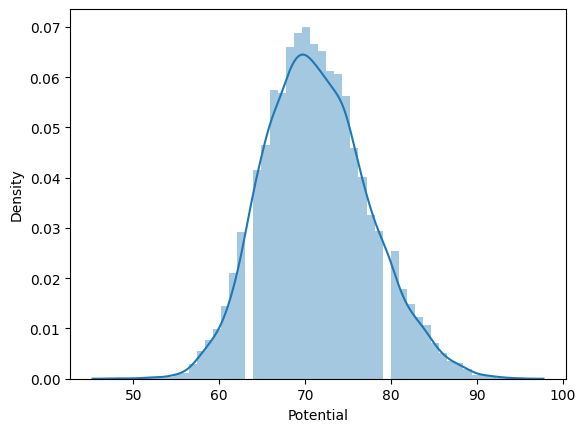

In [ ]:
sns.distplot(df1['Potential'])

In [ ]:
#As it is 2-sample-ind test,it is necessary to check if variances of both samples are equal or not.

stat, p_value = stats.levene(ageGreater35, ageLesser35)   
print(stat,p_value)

2.463364832596646 0.11655208819270027


In [ ]:
#As p_value>0.05,we can say that variances of both samples are equal.

In [ ]:
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))
print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.64


In [ ]:
test_stat, pval = stests.ztest(x1 = ageGreater35, x2 = ageLesser35, value = 0, alternative = 'smaller')
print("test_stat: ", test_stat)
print("p-value: ", pval)

test_stat:  -9.819838044068662
p-value:  4.624601038007058e-23


In [ ]:
print('Confidence interval:', stats.norm.interval(0.95, loc = nl_mean - n2_mean, 
                                                scale = np.sqrt(((nl_std**2) / n_1) + ((n2_std**2) / n_2))))

Confidence interval: (-3.8913195940652825, -2.6339234943829526)


In [ ]:
# Z score is less than -1.64 critical value and p value is also less than 0.05 and also our test-stat value value does not lie in confidence interval hence we can conclude to reject null hypothesis.
# We can infer that players having age greater than 35 have less potential compared to those having age less than 35.

#3. Use the statistical test to check the relationship between the Preferred Foot and Position with the 99% confident interval.


In [ ]:
# 𝐻0 : The variables(Preferred Foot and Position) are independent
# 𝐻1 : The variables(Preferred Foot and Position) are not independent (i.e. variables are dependent)

In [ ]:
table = pd.crosstab(df1['Preferred Foot'], df1['Position'])

# observed values  
observed_value = table.values
table

Position,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Preferred Foot,,,,,,,,,,,,,,,,,,,,,
Left,202,253,99,11,195,159,7,863,198,75,...,10,26,30,19,3,189,29,74,2,210
Right,540,1074,622,43,874,1370,7,115,286,216,...,963,452,269,164,9,650,137,200,63,1412


In [ ]:
df1['Preferred Foot'].shape

(13655,)

In [ ]:
df1['Position'].shape

(13655,)

In [ ]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.01, df = 26), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 45.6417


In [ ]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 3393.6967422645457
p-value: 0.0
Degrees of freedom: 26
Expected values: [[ 172.47220798  308.45097034  167.59091908   12.55188576  248.48084951
   355.40432076    3.2541926   227.32859758  112.50208715   67.64071769
    43.93160015    3.02175027  190.83515196   36.02856097   65.08385207
    13.94653973    3.95151959  226.16638594  111.10743317   69.50025632
    42.53694617    2.78930795  195.01911388   38.58542658   63.6891981
    15.10875137  377.02145734]
 [ 569.52779202 1018.54902966  553.40908092   41.44811424  820.51915049
  1173.59567924   10.7458074   750.67140242  371.49791285  223.35928231
   145.06839985    9.97824973  630.16484804  118.97143903  214.91614793
    46.05346027   13.04848041  746.83361406  366.89256683  229.49974368
   140.46305383    9.21069205  643.98088612  127.41457342  210.3108019
    49.89124863 1244.97854266]]


In [ ]:
# Test statistic is so much greater than critical value and p value is less than 0.01 hence we can conclude to reject null hypothesis 
#Hence,we can say that both variable(Preferred Foot and Position) are dependent.

#4. Does the International Reputation cause a significant effect on players' Wages? Check the claim with a 0.04 significance level. Check the Normality of data before the actual test.

In [ ]:
# 𝐻0 : The variables(International Reputation and Wage) are independent
# 𝐻1 : The variables(International Reputation and Wage) are not independent (i.e. variables are dependent)

In [ ]:
df1[['International Reputation','Wage']].corr()


,International Reputation,Wage
International Reputation,1.000000,0.673282
Wage,0.673282,1.000000


In [ ]:
s1,p1=shapiro(df1['International Reputation'])
p1

0.0

In [ ]:
#As p-value<0.04,we say that data is not normally distributed

In [ ]:
s2,p2=shapiro(df1['Wage'])
p2

0.0

In [ ]:
#As p-value<0.04,we say that data is not normally distributed

In [ ]:
stat, p_value = stats.levene(df1['International Reputation'], df1['Wage'])

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 1973.0612855560976
P-Value: 0.0


In [ ]:
#As p-value<0.04,we say that variances of both columns are not equal

In [ ]:
#As data is not normally distributed and also it doesn't satisfy the levene test,we cannot proceed further with hypothesis testing.

In [ ]:
# calculate the z-value for 99% of confidence level
# use 'stats.norm.isf()' to find the z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha/2' for a two-tailed test to the parameter 'q', here alpha = 0.01
# use 'round()' to round-off the value to 2 digits
# z_val = np.abs(round(stats.norm.isf(q = 0.04/2), 2))

# print('Critical value for two-tailed Z-test:', z_val)


Critical value for two-tailed Z-test: 2.05


In [ ]:
#if z is less than -2.05 or z is greater than 2.05 then we reject the null hypothesis.

In [ ]:
# define a function to calculate the test statistic and corresponding p-value
# here the standard deviations for populations are unknown, thus use the sample standard deviations
# pass the sample mean, sample standard deviation and sample size for both the samples as the function input
# 'value' denotes the value in null hypothesis
# def TwoSampZTest(samp_mean_1, samp_mean_2, samp_std_1, samp_std_2, value, n1, n2):
    
#     # calculate the test statistic
#     denominator = np.sqrt((samp_std_1**2 / n1) + (samp_std_2**2 / n2))
#     zscore = ((samp_mean_1 - samp_mean_2) - (value)) / denominator
    
#     # return the z-score
#     return zscore

# # given data
# sm_1 = np.mean(df1['International Reputation'])
# sm_2 = np.mean(df1['Wage'])
# sstd_1 = np.std(df1['International Reputation'])
# sstd_2 = np.std(df1['Wage'])
# null_val = 0
# n_1 = len(df1['International Reputation'])
# n_2 = len(df1['Wage'])

# pass the given data to the function 'TwoSampZTest'
# zscore = TwoSampZTest(samp_mean_1 = sm_1, samp_mean_2 = sm_2, samp_std_1 = sstd_1, samp_std_2 = sstd_2, value = null_val, 
#                       n1 = n_1, n2 = n_2)

# print('z-score:', zscore)

z-score: -51.51631214673278


In [ ]:
# calculate the corresponding p-value for the test statistic
# use 'cdf()' to calculate P(Z <= z_score)
# p_value = stats.norm.cdf(zscore)

# for a two-tailed test multiply the p-value by 2
# req_p = p_value*2
# print('p-value:', req_p)

p-value: 0.0


In [ ]:
# calculate the 96% confidence interval for the population mean
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (sample_std / n^(1/2)) to the parameter, 'scale'
# print('Confidence interval:', stats.norm.interval(0.96, loc = sm_1 - sm_2, 
#                                                   scale = np.sqrt((sstd_1**2/n_1) + (sstd_2**2/n_2))))

Confidence interval: (-10030.906194910232, -9261.783955217928)


In [ ]:
#Here the z-score is less than -2.05, the p-value is less than 0.04, also the confidence interval does not contain the value in the null hypothesis (i.e. 0). 
#Thus, we reject the null hypothesis and conclude that both variables have different averages.

#5. Check the claim that the median wages of under top 20 players are lesser than or equal to 25000. Test the claim with a 0.05 % significance level. Check the data is normally distributed or not before the testing the claim statistically

In [ ]:
# H0: median wage > 25000
# H1: median wage <= 25000

stat, p_value = shapiro(top_20['Wage'])
print(stat, p_value)

0.944684624671936 0.29350465536117554


In [ ]:
# The p value is greater than 0.05 and data is normally distributed.

In [ ]:
n=20
df=n-1
t_val = np.abs(round(stats.t.isf(q = 0.05, df = 19), 2))
print(t_val)

1.73


In [ ]:
# As it is left-tailed test,if test statatistic is less than -1.73 then we reject the null hypothesis.

In [ ]:
top_20['Wage'].median()

162500.0

In [ ]:
t_stat, p_val = stats.ttest_1samp(a = top_20['Wage'], popmean = 162500.0)

# print the test statistic value and corresponding p-value
print('Test Statistic:', t_stat)
print('p-value:', p_val)

Test Statistic: 0.7931686900595447
p-value: 0.4374729795995532


In [ ]:
#As it is one-tailed test,so,required p-value will be (req_p_val=p_val/2)

In [ ]:
req_p_val=p_val/2
req_p_val

0.2187364897997766

In [ ]:
# req_p_val is greater than 0.05 and test statistic is greater than -1.73 hence we fail to reject null hypothesis and 
#conclude that the median wages of under top 20 players  are greater than 25000.